In [1]:
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage

import pandas as pd
import numpy as np

import re

In [2]:
ds = [4, 8, 6, 14, 18, 16]
ob = [8, 10, 12, 19, 17, 16]

In [3]:
DSOB_df = pd.DataFrame(
                        {
                            'DS': ds,
                            'OB': ob
                        }
                    )

In [4]:
DSOB_df

,DS,OB
0,4,8
1,8,10
2,6,12
3,14,19
4,18,17
5,16,16


In [5]:
distance_matrix = pairwise_distances(DSOB_df, metric="euclidean")
distance_matrix = np.around(distance_matrix, 2)

In [6]:
pd.DataFrame(distance_matrix)

,0,1,2,3,4,5
0,0.00,4.47,4.47,14.87,16.64,14.42
1,4.47,0.00,2.83,10.82,12.21,10.00
2,4.47,2.83,0.00,10.63,13.00,10.77
3,14.87,10.82,10.63,0.00,4.47,3.61
4,16.64,12.21,13.00,4.47,0.00,2.24
5,14.42,10.00,10.77,3.61,2.24,0.00


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z3 = linkage(DSOB_df, method='average', metric='euclidean')
Z3


array([[ 4.        ,  5.        ,  2.23606798,  2.        ],
       [ 1.        ,  2.        ,  2.82842712,  2.        ],
       [ 3.        ,  6.        ,  4.03884362,  3.        ],
       [ 0.        ,  7.        ,  4.47213595,  3.        ],
       [ 8.        ,  9.        , 12.59503063,  6.        ]])

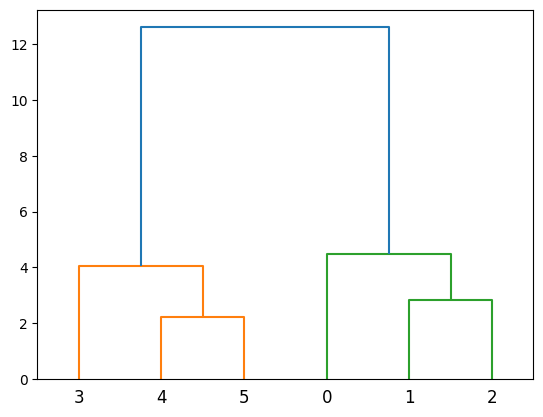

In [8]:
import matplotlib.pyplot as plt

dendrogram(Z3)
plt.show()

In [9]:
#Load Excel file into a dataframe
WC_df = pd.read_csv("wine.csv")

In [10]:
WC_df

,Class,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,TotalPhenols,Flavanoids,Nonflavanoids,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
# Exclude labels
WC_reduced = WC_df.iloc[:,1:]

# Label list
labelList = list(WC_df['Class'])


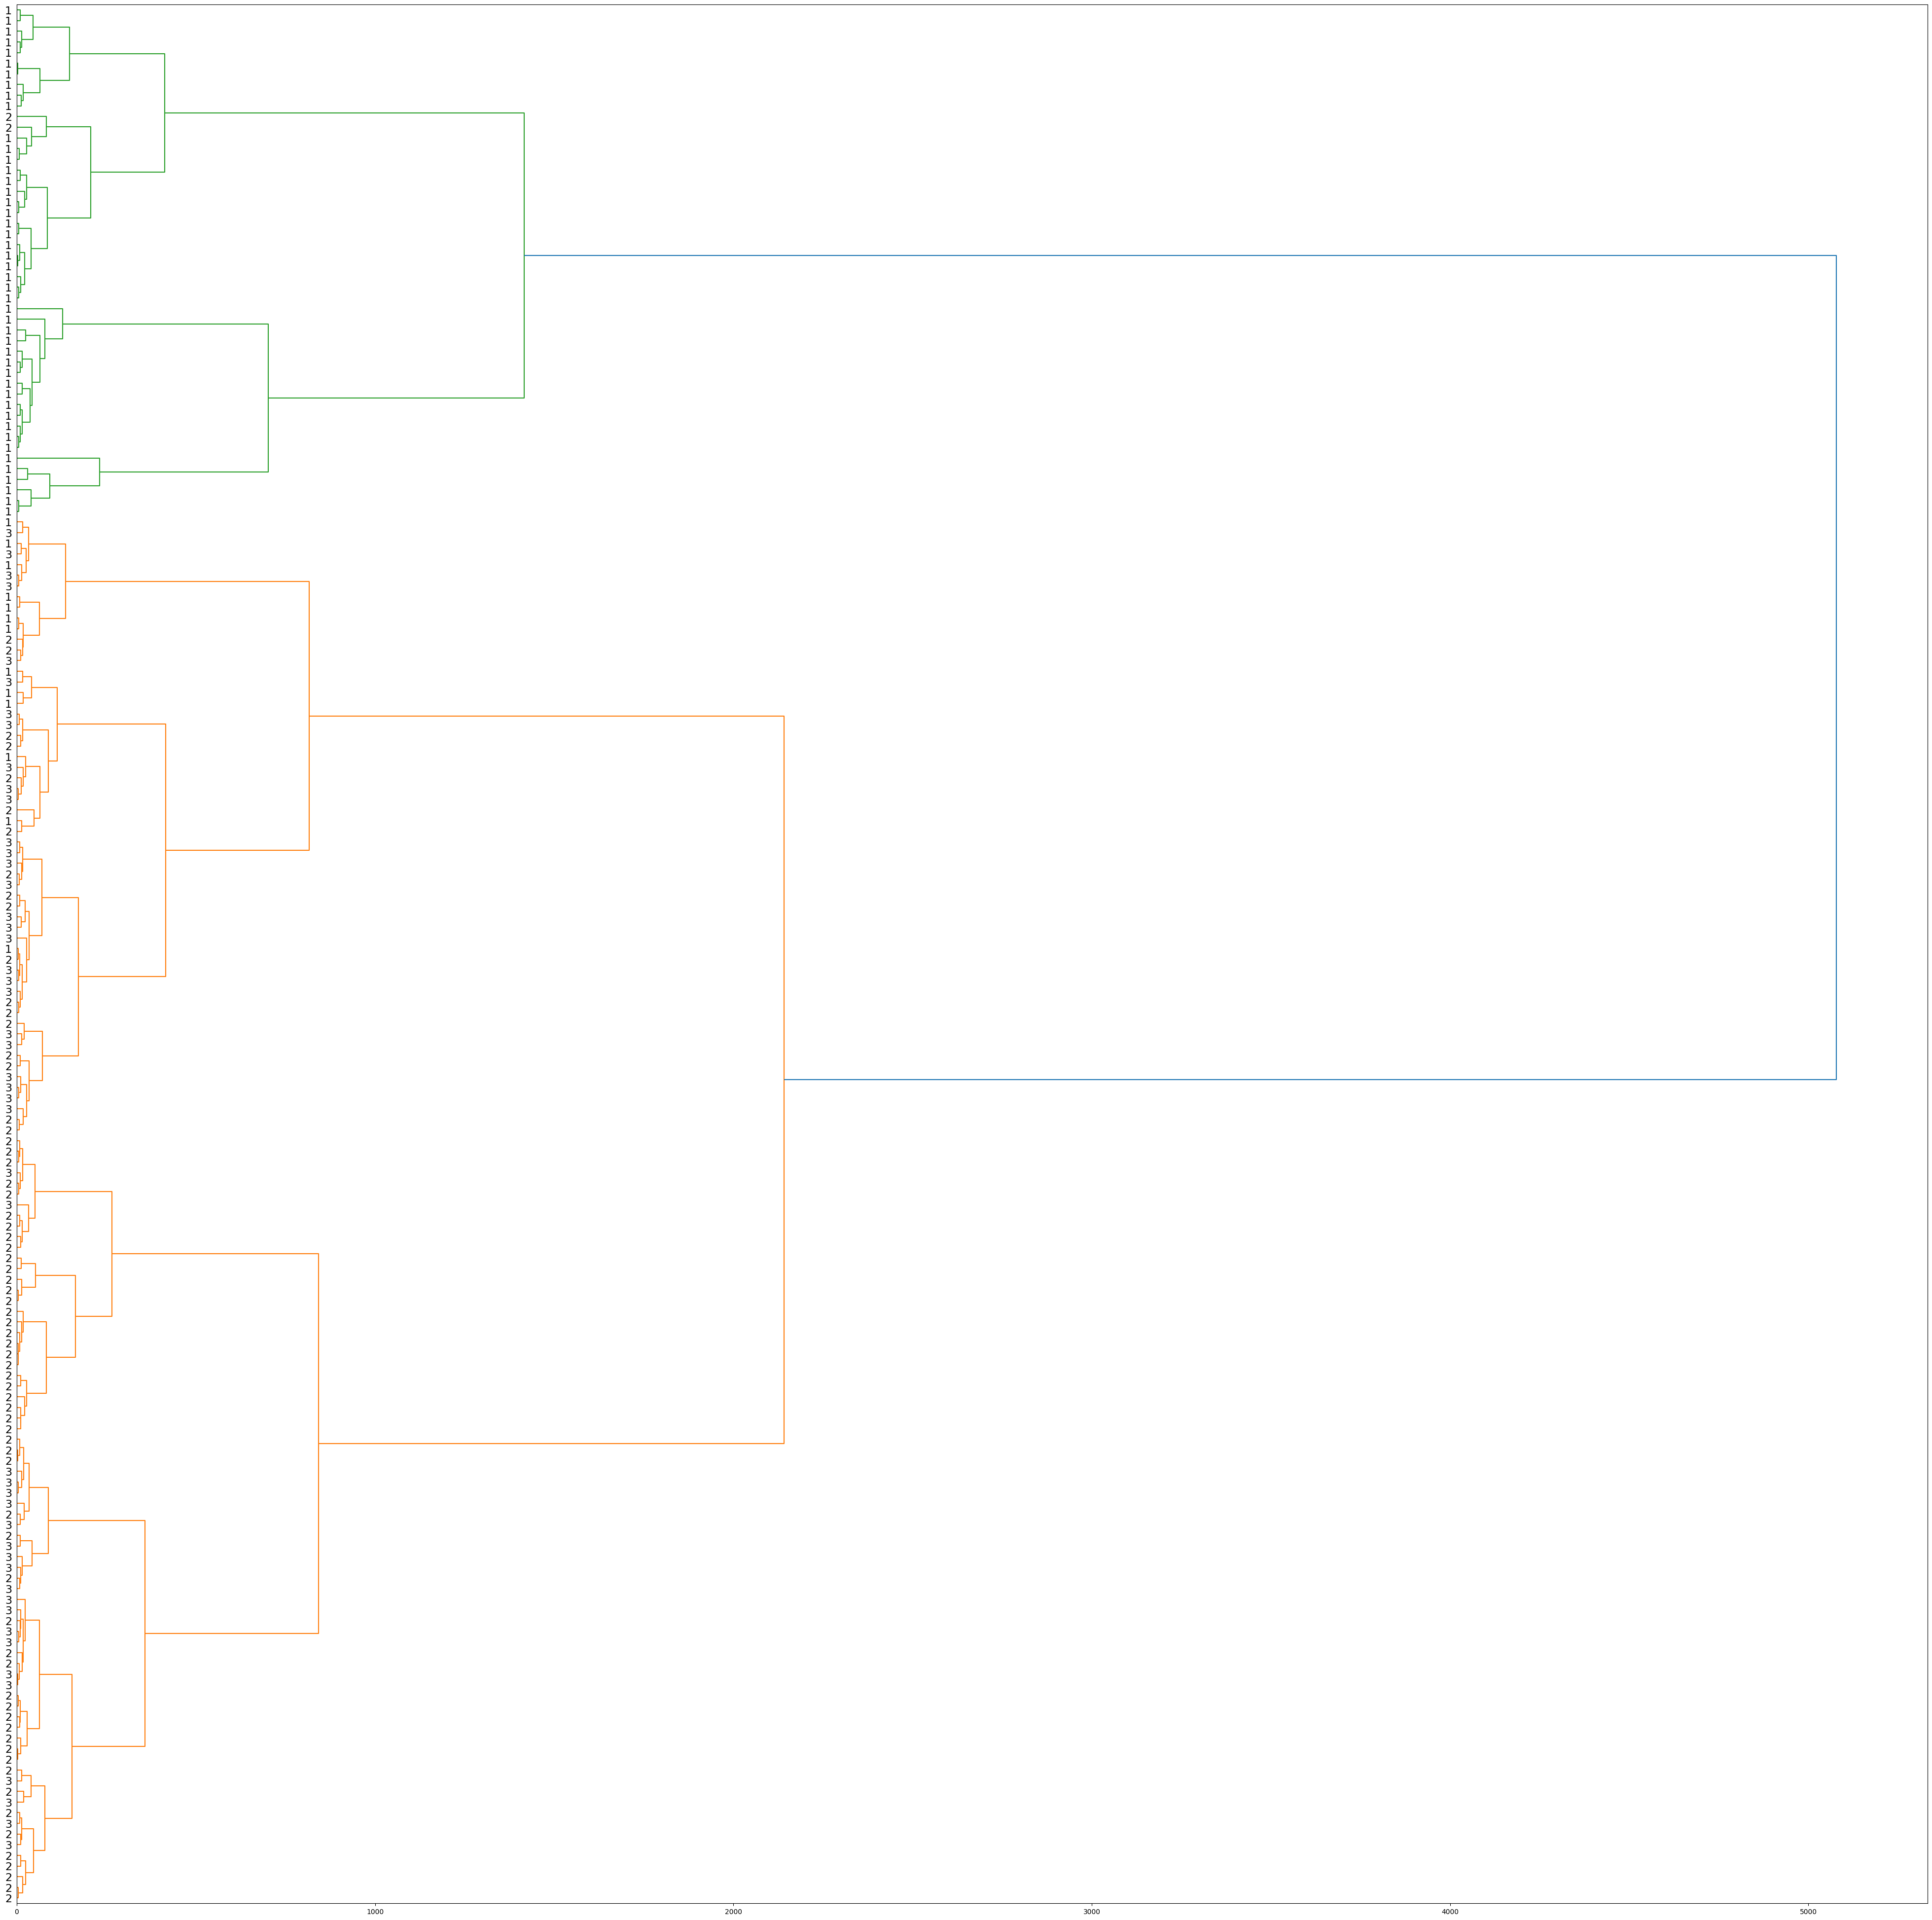

In [12]:
labelList = list(WC_df['Class'])

Z2 = linkage(WC_reduced, method='ward', metric='euclidean')
Z2

import matplotlib.pyplot as plt
plt.figure(figsize=(50, 50))

dendrogram(Z2,    
           orientation='right', labels=labelList, distance_sort='descending',show_leaf_counts=False, leaf_font_size=16)
plt.show()


In [13]:
FMADf  = pd.read_excel("FreeMusicArchive.xlsx", sheet_name="FMADataset")
WC_reduced = FMADf.iloc[:,:-3]
WC_reduced


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0.388990,0.386740,0.406370
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0.388990,0.386740,0.406370
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0.388990,0.386740,0.406370
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,0.557339,0.614272,0.798387
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0.388990,0.386740,0.406370
...,...,...,...,...,...,...,...,...,...,...,...,...
9154,123821,0.737893,0.372404,0.329644,0.919781,0.104495,0.031262,111.243,0.037006,0.394235,0.174907,0.411849
9155,123822,0.460245,0.223862,0.477445,0.910779,0.088253,0.049367,79.372,0.048895,0.394235,0.174907,0.411849
9156,123823,0.303772,0.227905,0.207037,0.664426,0.129962,0.036349,99.323,0.031072,0.394235,0.174907,0.411849
9157,123824,0.497877,0.328307,0.604455,0.909813,0.127005,0.040391,101.553,0.037689,0.394235,0.174907,0.411849


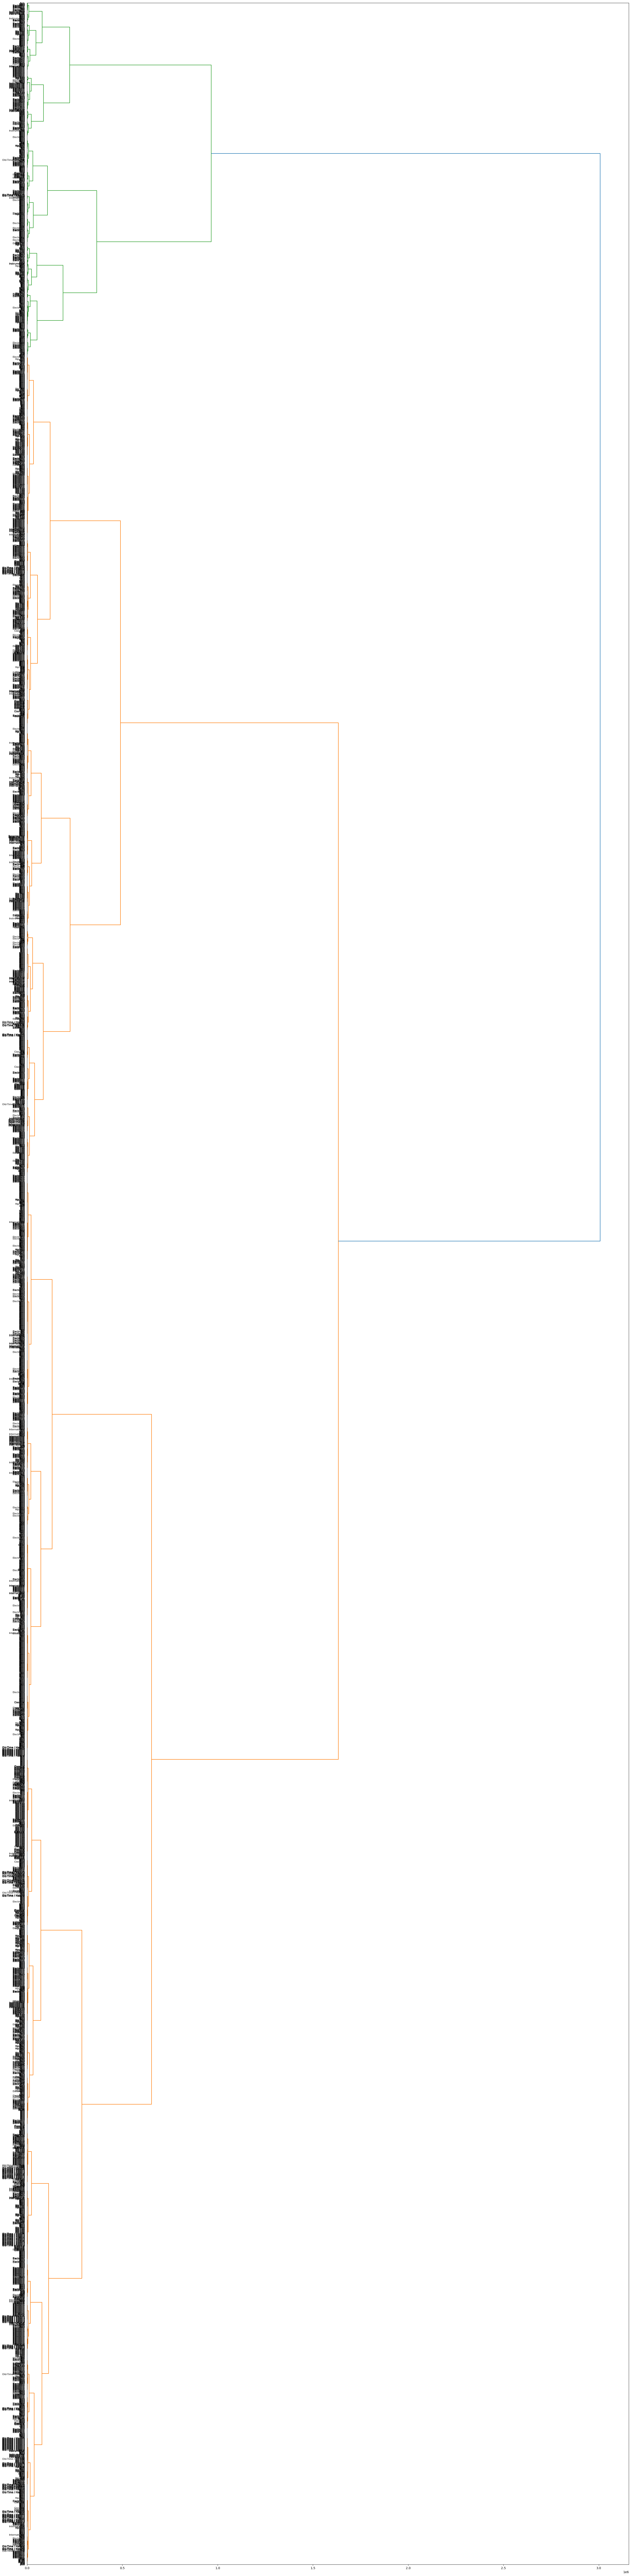

In [14]:
labelList = list(FMADf['genre_top'])

Z2 = linkage(WC_reduced, method='ward', metric='euclidean')
Z2

import matplotlib.pyplot as plt
plt.figure(figsize=(35, 150))

dendrogram(Z2,    
           orientation='right', labels=labelList, distance_sort='descending',show_leaf_counts=False, leaf_font_size=8)
plt.show()


In [15]:
OTTDf = pd.read_csv("Netflix.csv", delimiter="," )

#Reset dataframe indices
OTTDf = OTTDf.reset_index()

#Clean comma separated values
OTTDf[['genre']] = OTTDf.listed_in.str.split(',', expand= True)[[0]]
OTTDf[['primary_country']] = OTTDf.country.str.split(',', expand= True)[[0]]

# Drop ratings with improper inputs
for i in range(0,len(OTTDf)):
    if (re.search('min',str(OTTDf['rating'][i])) or (re.search('season',str(OTTDf['rating'][i]).lower()))):
        OTTDf = OTTDf.drop([i])
        
# Drop unnecessary columns
OTTDf = OTTDf[['type','primary_country','rating','duration','genre']]

# Drop all missing values
OTTDf = OTTDf.dropna()

FileNotFoundError: [Errno 2] No such file or directory: 'Netflix.csv'

In [ ]:
OTTDf

,type,primary_country,rating,duration,genre
0,Movie,United States,PG-13,90 min,Documentaries
1,TV Show,South Africa,TV-MA,2 Seasons,International TV Shows
4,TV Show,India,TV-MA,2 Seasons,International TV Shows
7,Movie,United States,TV-MA,125 min,Dramas
8,TV Show,United Kingdom,TV-14,9 Seasons,British TV Shows
...,...,...,...,...,...
8801,Movie,United Arab Emirates,TV-MA,96 min,Dramas
8802,Movie,United States,R,158 min,Cult Movies
8804,Movie,United States,R,88 min,Comedies
8805,Movie,United States,PG,88 min,Children & Family Movies


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()

# Data (features) are stored in 'data' attribute
X = iris.data

# Perform hierarchical clustering with Ward linkage
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')  # 3 clusters, Ward linkage
clustering.fit(X)

# Print cluster labels for each data point
print(len(clustering.labels_))




150


In [ ]:
iris  = pd.DataFrame(iris.data)
iris['cluster'] = clustering.labels_

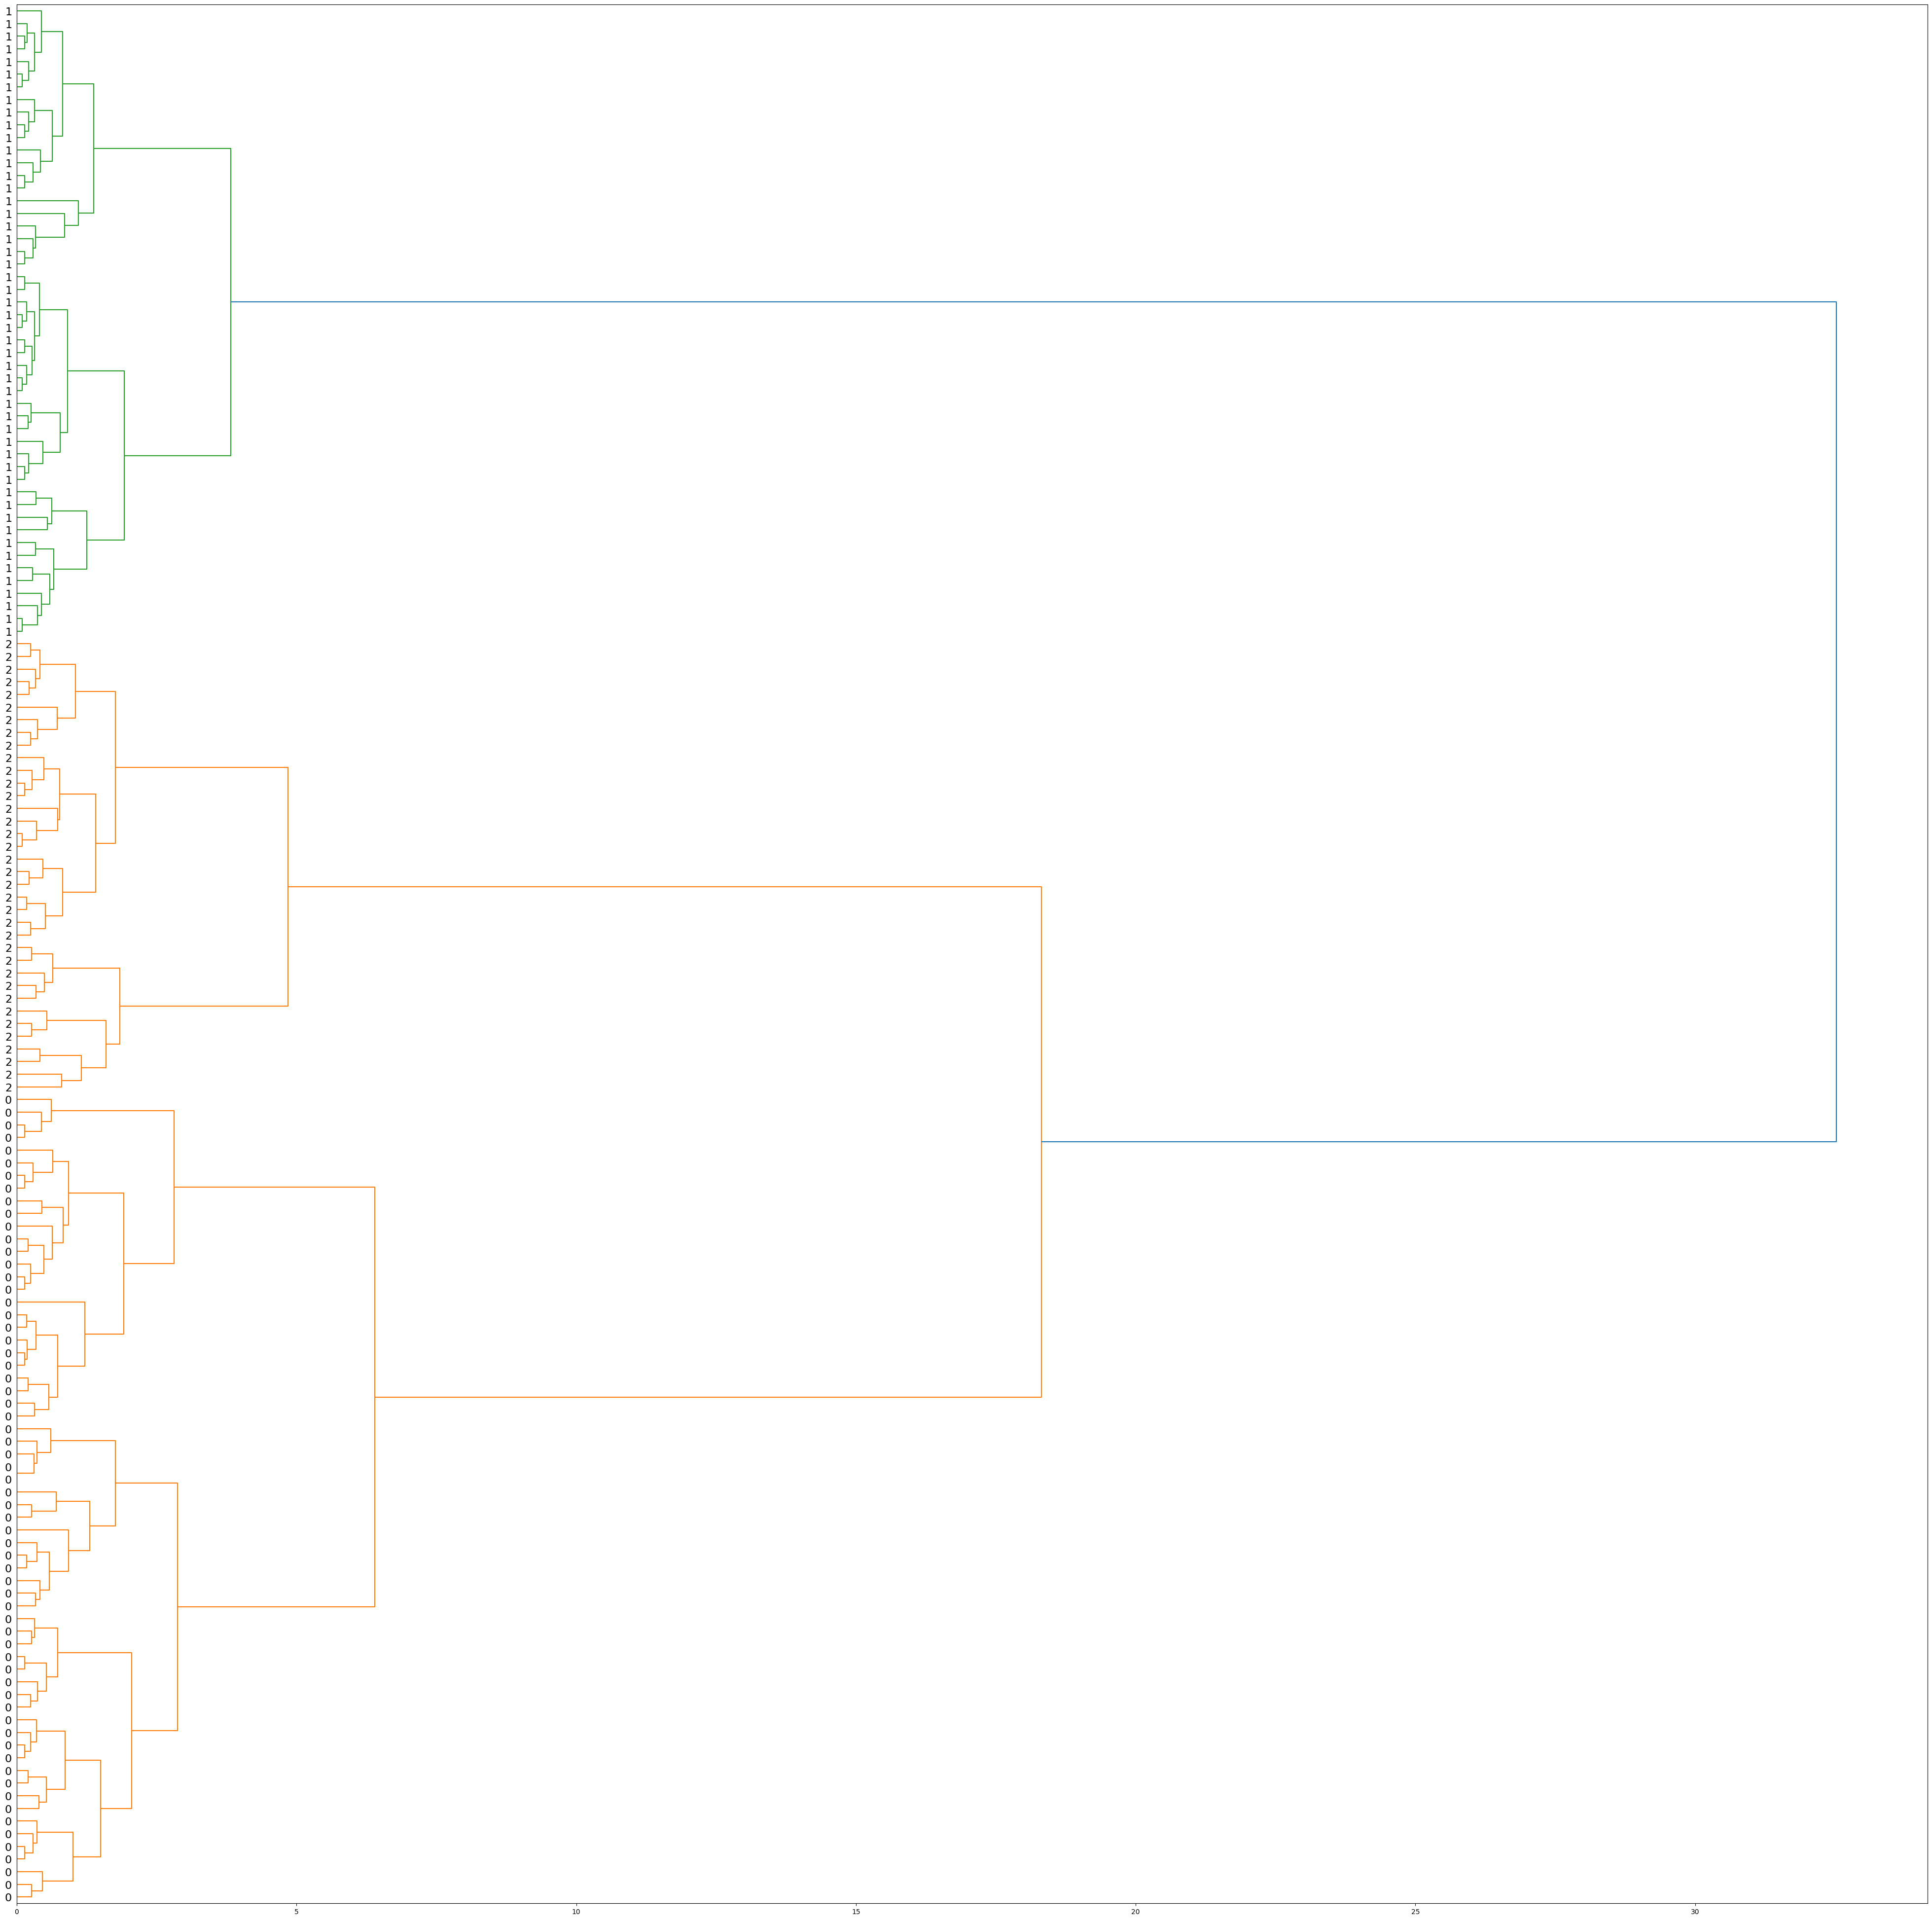

In [ ]:
labelList = list(iris['cluster'])

Z2 = linkage(iris, method='ward', metric='euclidean')
Z2

import matplotlib.pyplot as plt
plt.figure(figsize=(50, 50))

dendrogram(Z2,    
           orientation='right', labels=labelList, distance_sort='descending',show_leaf_counts=False, leaf_font_size=16,)
plt.show()
dendrogram()